In [241]:
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [242]:
main_data = pd.read_csv('data.csv')
food_relationship = pd.read_csv('food_hierarchy.csv')

In [243]:
main_data.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,symptom_value,user_number
0,4,7,14,1,53,24,5,28,56,9,...,13,19,0,0,39,3,13,34,8.803009,0
1,0,12,0,0,35,10,0,12,42,6,...,17,14,11,13,18,3,10,16,0.000000,0
2,6,14,0,0,26,12,2,40,62,4,...,0,11,17,0,18,1,9,14,0.000000,0
3,3,13,11,1,35,16,5,49,24,0,...,13,14,0,0,31,2,11,26,0.000000,0
4,0,14,5,3,34,10,2,26,44,7,...,0,0,7,15,17,1,0,13,3.257174,0


In [244]:
food_relationship.head(5)

,parent_food,child_food
0,F9,F15
1,F9,F6
2,F9,F11
3,F9,F7
4,F9,F1


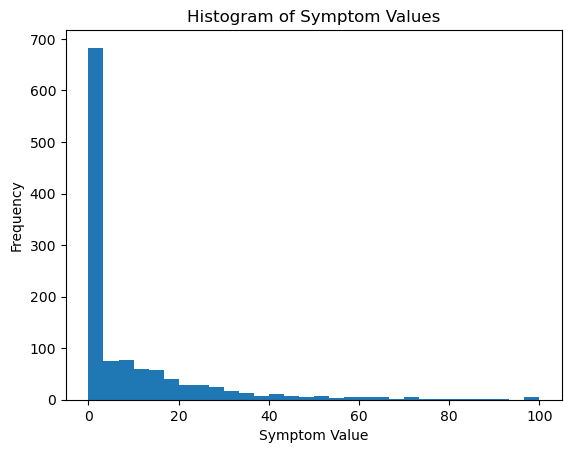

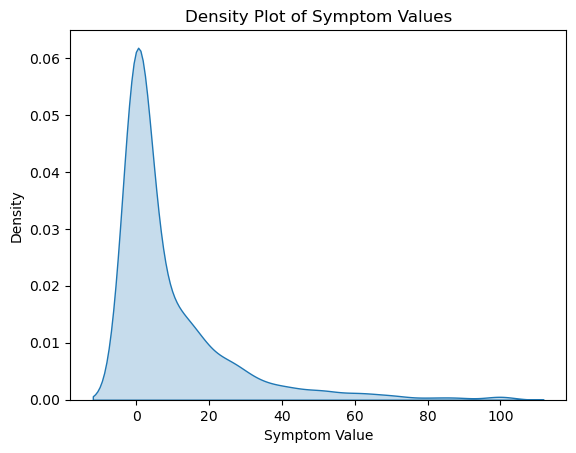

In [245]:

symptom_values = main_data['symptom_value']

plt.hist(symptom_values, bins=30)
plt.xlabel('Symptom Value')
plt.ylabel('Frequency')
plt.title('Histogram of Symptom Values')
plt.show()

sns.kdeplot(symptom_values, shade=True)
plt.xlabel('Symptom Value')
plt.ylabel('Density')
plt.title('Density Plot of Symptom Values')
plt.show()

In [246]:
Q1 = main_data['symptom_value'].quantile(0.25)
Q3 = main_data['symptom_value'].quantile(0.75)

In [247]:
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
main_data1 = main_data[(main_data['symptom_value'] >= lower_bound) & (main_data['symptom_value'] <= upper_bound)]

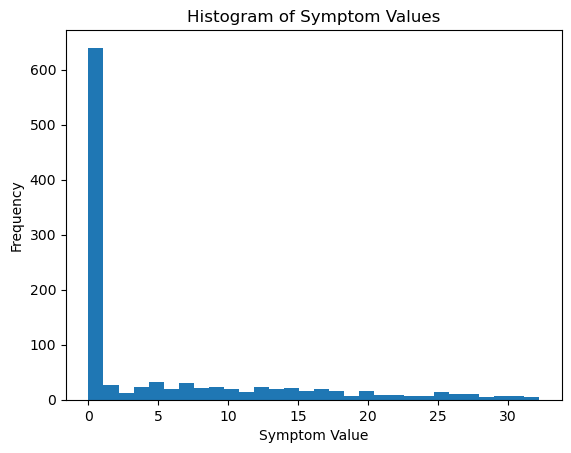

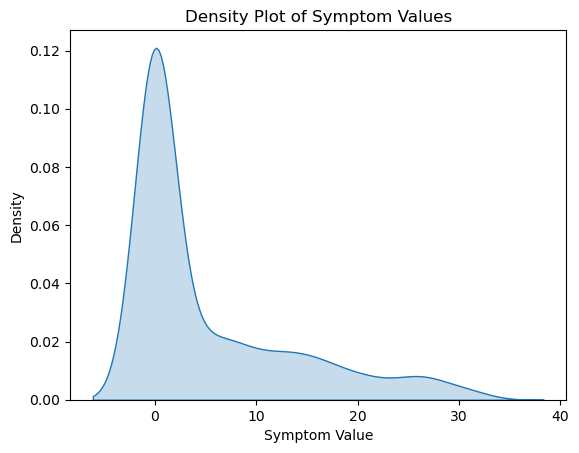

In [248]:

symptom_values = main_data1['symptom_value']


plt.hist(symptom_values, bins=30)
plt.xlabel('Symptom Value')
plt.ylabel('Frequency')
plt.title('Histogram of Symptom Values')
plt.show()

sns.kdeplot(symptom_values, shade=True)
plt.xlabel('Symptom Value')
plt.ylabel('Density')
plt.title('Density Plot of Symptom Values')
plt.show()

/var/folders/vn/0pllmk4d2q7dl5gq08l8hdxc0000gn/T/ipykernel_38710/2779668559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data1['symptom_value_log1p'] = np.log1p(main_data1['symptom_value'])


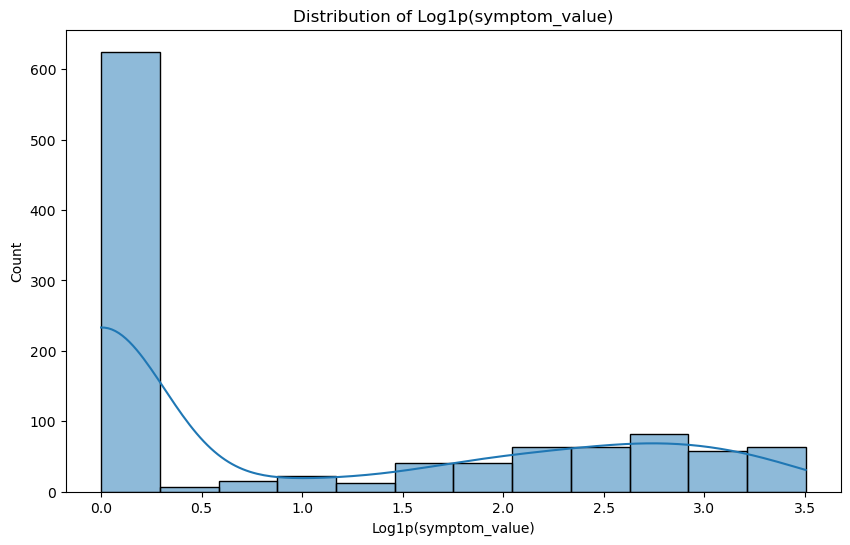

In [249]:


main_data1['symptom_value_log1p'] = np.log1p(main_data1['symptom_value'])

# Check the distribution of the transformed target variable using a histogram or kernel density plot
plt.figure(figsize=(10, 6))
sns.histplot(main_data1['symptom_value_log1p'], kde=True)
plt.xlabel('Log1p(symptom_value)')
plt.title('Distribution of Log1p(symptom_value)')
plt.show()

In [250]:
# Create a dictionary to store parent-child relationships
parent_child_dict = {}
for index, row in food_relationship.iterrows():
    parent = row["parent_food"]
    child = row["child_food"]
    if parent not in parent_child_dict:
        parent_child_dict[parent] = []
    parent_child_dict[parent].append(child)

# Iterate over the parent-child dictionary and create aggregated features
for parent, children in parent_child_dict.items():
    main_data1[f"{parent}_aggregated"] = main_data1[parent] + main_data1[children].sum(axis=1)


/var/folders/vn/0pllmk4d2q7dl5gq08l8hdxc0000gn/T/ipykernel_38710/3492525858.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data1[f"{parent}_aggregated"] = main_data1[parent] + main_data1[children].sum(axis=1)
/var/folders/vn/0pllmk4d2q7dl5gq08l8hdxc0000gn/T/ipykernel_38710/3492525858.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data1[f"{parent}_aggregated"] = main_data1[parent] + main_data1[children].sum(axis=1)
/var/folders/vn/0pllmk4d2q7dl5gq08l8hdxc0000gn/T/ipykernel_38710/3492525

In [251]:
main_data1["total_food"] = main_data1[food_group_columns].sum(axis=1)

# Calculate the ratio of each food group to the total food consumed
for food_group in food_group_columns:
    main_data1[f"{food_group}_ratio"] = main_data1[food_group] / main_data1["total_food"]


/var/folders/vn/0pllmk4d2q7dl5gq08l8hdxc0000gn/T/ipykernel_38710/4209087823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data1["total_food"] = main_data1[food_group_columns].sum(axis=1)
/var/folders/vn/0pllmk4d2q7dl5gq08l8hdxc0000gn/T/ipykernel_38710/4209087823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data1[f"{food_group}_ratio"] = main_data1[food_group] / main_data1["total_food"]
/var/folders/vn/0pllmk4d2q7dl5gq08l8hdxc0000gn/T/ipykernel_38710/4209087823.py:5: SettingWithCopyWar

In [252]:
#reverse log
main_data1['symptom_value'] = np.expm1(main_data1['symptom_value_log1p'])

X = main_data1.drop(columns=['symptom_value'])
y = main_data1['symptom_value']

/var/folders/vn/0pllmk4d2q7dl5gq08l8hdxc0000gn/T/ipykernel_38710/2033356598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data1['symptom_value'] = np.expm1(main_data1['symptom_value_log1p'])


In [253]:
main_data1.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F11_ratio,F12_ratio,F13_ratio,F14_ratio,F15_ratio,F16_ratio,F17_ratio,F18_ratio,F19_ratio,F20_ratio
0,4,7,14,1,53,24,5,28,56,9,...,0.028653,0.048711,0.037249,0.054441,0.000000,0.000000,0.111748,0.008596,0.037249,0.097421
1,0,12,0,0,35,10,0,12,42,6,...,0.039474,0.000000,0.074561,0.061404,0.048246,0.057018,0.078947,0.013158,0.043860,0.070175
2,6,14,0,0,26,12,2,40,62,4,...,0.036735,0.000000,0.000000,0.044898,0.069388,0.000000,0.073469,0.004082,0.036735,0.057143
3,3,13,11,1,35,16,5,49,24,0,...,0.000000,0.059259,0.048148,0.051852,0.000000,0.000000,0.114815,0.007407,0.040741,0.096296
4,0,14,5,3,34,10,2,26,44,7,...,0.043478,0.000000,0.000000,0.000000,0.033816,0.072464,0.082126,0.004831,0.000000,0.062802


In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [255]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [256]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

#XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [257]:
models = {'Linear Regression': lr, 'KNN': knn, 'XGBoost': xgb}

for name, model in models.items():
    if name == 'KNN':
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} R^2 Score: {r2:.4f}")

Linear Regression R^2 Score: 0.8617
KNN R^2 Score: 0.3743
XGBoost R^2 Score: 0.9994


In [258]:
def cross_val(model, X, y, n_splits=5, scaled=False):
    if scaled and isinstance(model, KNeighborsRegressor):
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    cv_scores = cross_val_score(model, X, y, cv=n_splits, scoring='r2')
    return np.mean(cv_scores), np.std(cv_scores)

for name, model in models.items():
    mean_r2, std_r2 = cross_val(model, X, y, n_splits=5, scaled=(name == 'KNN'))
    print(f"{name} Cross-Validation R^2 Score: {mean_r2:.4f} ± {std_r2:.4f}")

Linear Regression Cross-Validation R^2 Score: 0.8566 ± 0.0173
KNN Cross-Validation R^2 Score: 0.3670 ± 0.0299
XGBoost Cross-Validation R^2 Score: 0.9996 ± 0.0001
